In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.datasets import make_classification

In [53]:
# Suppress the specific DataConversionWarning
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


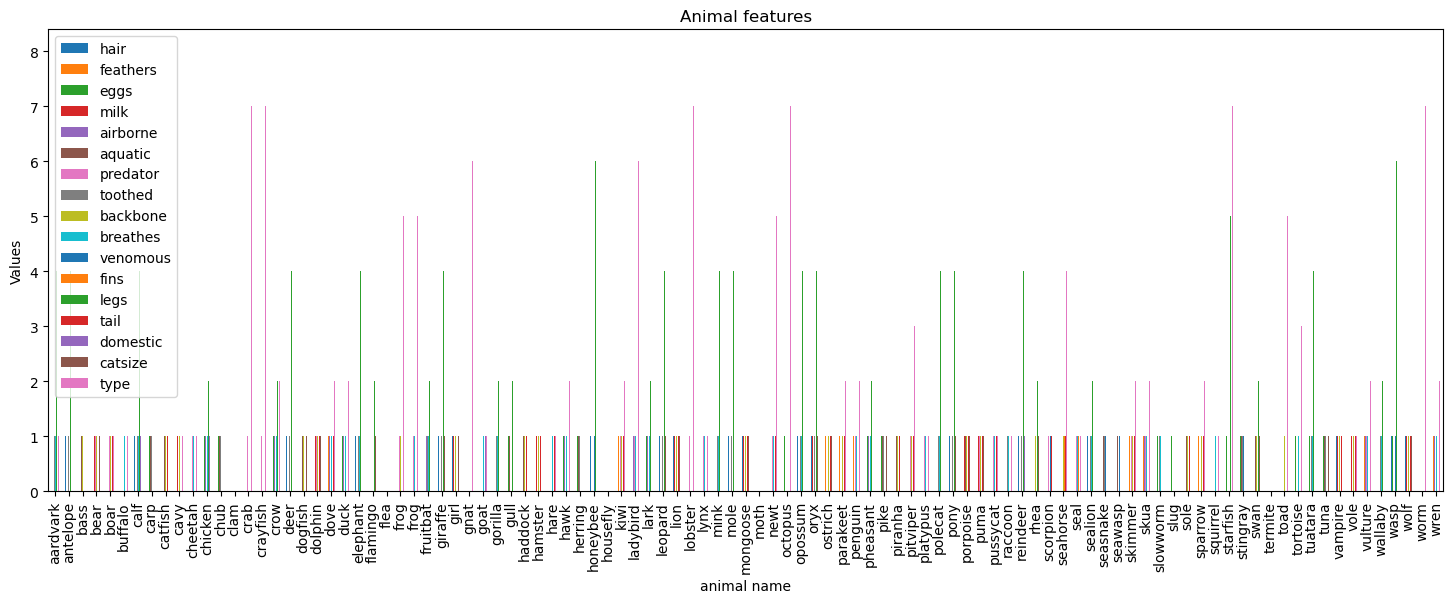

In [55]:
df.set_index('animal name', inplace=True)
df.plot(kind='bar', figsize=(18, 6))
plt.title('Animal features')
plt.ylabel('Values')
plt.show()

In [56]:
# One-Hot Encoding using pd.get_dummies
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [57]:
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [58]:
df[df.duplicated()]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


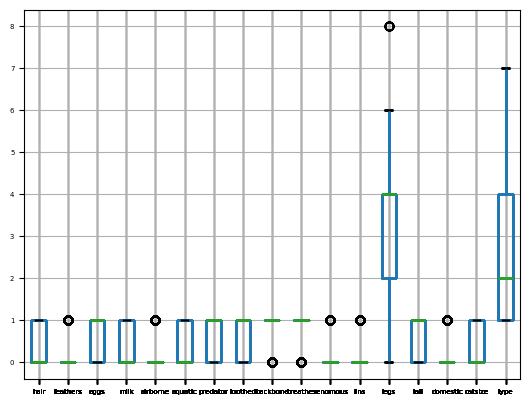

In [59]:
#find numeric column
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col
#find outliers of numeric column
import matplotlib.pyplot as plt
for i in num_col:
    df.boxplot(column = num_col, fontsize = 5)

plt.show()

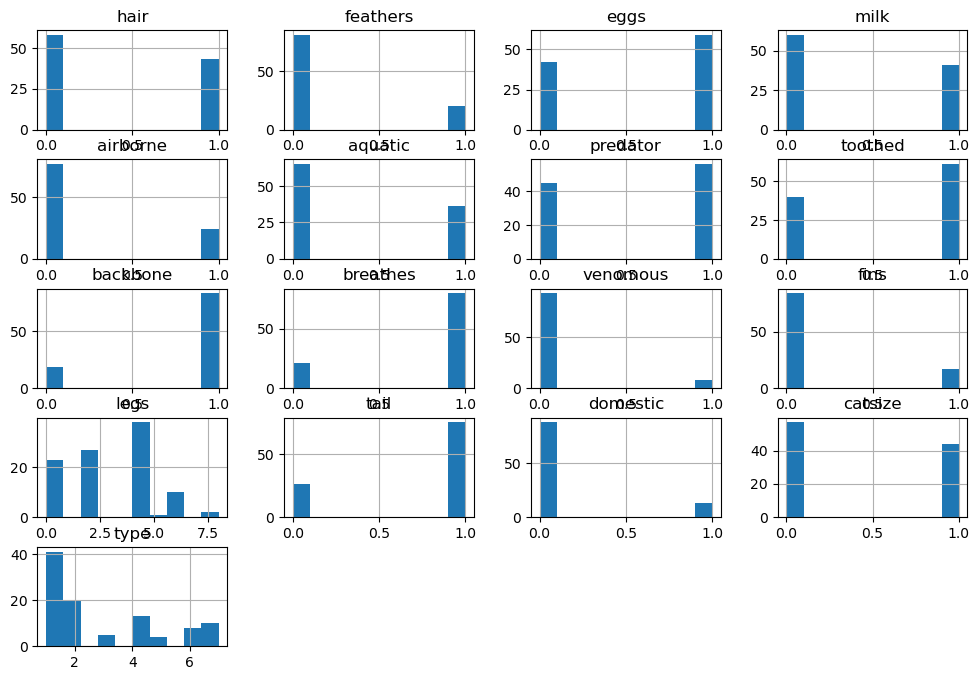

In [60]:
# Visualizing distributions
df.hist(figsize=(12, 8))
plt.show()



In [61]:
#Pairplot for feature relationships
#sns.pairplot(df, hue='type')  
#plt.show()

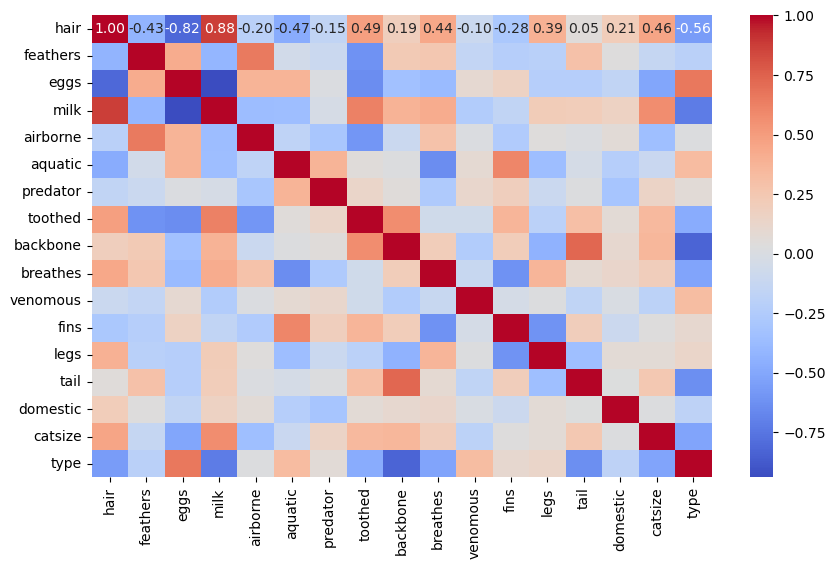

In [62]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show() 

In [63]:
target = df[['type']]
target
print(target)

             type
animal name      
aardvark        1
antelope        1
bass            4
bear            1
boar            1
...           ...
wallaby         1
wasp            6
wolf            1
worm            7
wren            2

[101 rows x 1 columns]


In [64]:
# Getting the number of rows and columns
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display first few rows after encoding
df.head()


Rows: 101, Columns: 17


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [65]:

# Separate features and target variable
feature = df.drop(columns=['type'])
target = df['type']

# Select top k features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=15)  # Selecting top 15 features
X_selected = selector.fit_transform(feature, target)

# Get selected feature names
selected_features = feature.columns[selector.get_support()]
selected_features

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'catsize'],
      dtype='object')

In [66]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
# Convert Series to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (80, 16)
Testing Features (X_test): (21, 16)
Training Target (y_train): (80, 1)
Testing Target (y_test): (21, 1)


In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Check the shape of the data after scaling
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (80, 16)
X_test_scaled shape: (21, 16)


In [68]:
k=3
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
# Train the KNN classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of KNN Classifier with K={k} and Euclidean Distance: {accuracy * 100:.2f}%')

Accuracy of KNN Classifier with K=3 and Euclidean Distance: 100.00%


In [69]:
# Create a GridSearchCV object
# Define the parameter grid
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn, param_grid)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [70]:
# Print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Best KNN Classifier: {accuracy * 100:.2f}%')

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Accuracy of Best KNN Classifier: 95.24%


In [71]:
# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Print the evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 95.24%
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


In [72]:
# Convert to NumPy array (again, to avoid indexing errors)
X_train = np.array(X_train)
X_test = np.array(X_test)
# Debugging: Print Shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (80, 16)
X_test shape: (21, 16)


In [73]:
# Create meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, ].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
print(xx,yy)

[[-1.        -0.8989899 -0.7979798 ...  8.7979798  8.8989899  9.       ]
 [-1.        -0.8989899 -0.7979798 ...  8.7979798  8.8989899  9.       ]
 [-1.        -0.8989899 -0.7979798 ...  8.7979798  8.8989899  9.       ]
 ...
 [-1.        -0.8989899 -0.7979798 ...  8.7979798  8.8989899  9.       ]
 [-1.        -0.8989899 -0.7979798 ...  8.7979798  8.8989899  9.       ]
 [-1.        -0.8989899 -0.7979798 ...  8.7979798  8.8989899  9.       ]] [[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.96969697 -0.96969697 -0.96969697 ... -0.96969697 -0.96969697
  -0.96969697]
 [-0.93939394 -0.93939394 -0.93939394 ... -0.93939394 -0.93939394
  -0.93939394]
 ...
 [ 1.93939394  1.93939394  1.93939394 ...  1.93939394  1.93939394
   1.93939394]
 [ 1.96969697  1.96969697  1.96969697 ...  1.96969697  1.96969697
   1.96969697]
 [ 2.          2.          2.         ...  2.          2.
   2.        ]]


In [82]:
# Select multiple features (excluding 'animal name' and 'type')
feature_columns = df.columns[1:-1]  # Excluding 'animal name' and 'type'
X_full = df[feature_columns].values
y = df["type"].values 

In [87]:
from sklearn.decomposition import PCA
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)

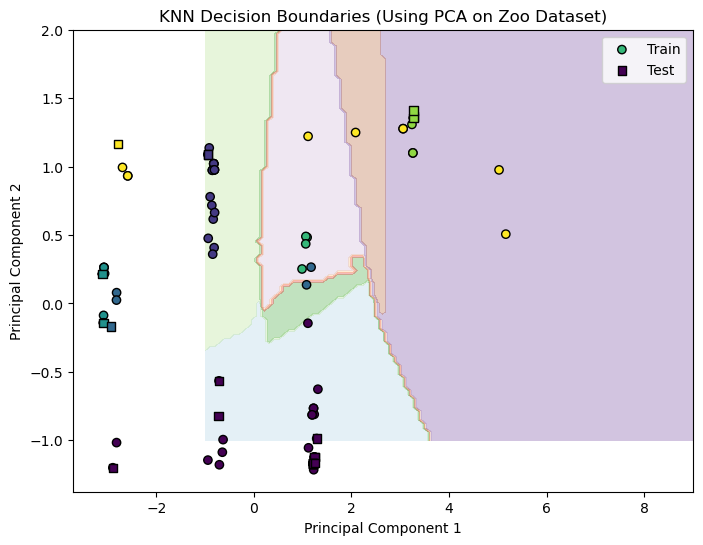

In [88]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Reshape to match grid shape

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", marker="s", label="Test")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("KNN Decision Boundaries (Using PCA on Zoo Dataset)")
plt.show()

In [ ]:
1. What are the key hyperparameters in KNN?

Key Hyperparameters in KNN:
n_neighbors (k) – Number of neighbors to consider (small k → overfitting, large k → underfitting).
weights – "uniform" (equal) or "distance" (closer neighbors have more influence).
metric – Distance measure ("euclidean" (default), "manhattan", "minkowski", etc.).
p – Power parameter for Minkowski (p=1 → Manhattan, p=2 → Euclidean).
algorithm – Search method ("auto", "ball_tree", "kd_tree", "brute").
leaf_size – Affects speed and memory for tree-based methods.
n_jobs – Number of parallel processes (use -1 for all cores).
Proper tuning of these hyperparameters improves KNN performance! 

In [ ]:
2. What distance metrics can be used in KNN?

Distance Metrics in KNN:
Euclidean Distance (default) – Straight-line distance.
Manhattan Distance – Sum of absolute differences (good for grid-like data).
Minkowski Distance – Generalized form (p=1 → Manhattan, p=2 → Euclidean).
Chebyshev Distance – Maximum absolute difference between features.
Hamming Distance – Used for categorical data (counts differences in binary vectors).
Mahalanobis Distance – Accounts for correlations between features.
Cosine Similarity – Measures the angle between vectors (for text/data with directionality).
Choosing the right metric impacts classification accuracy! 🚀